#  Нелинейное уравнение Шредингера

Нелинейное **уравнение Шредингера** (читается как «Шрёдингера», в русскоязычной литературе используется сокращение *НУШ*) имеет вид

$$
iw_t + \alpha w_{xx} + \lambda w|w|^2 = 0
$$

Здесь $w = w(x, t)$ есть комплекснозначная функция двух вещественных аргументов, $\alpha$
и $\lambda$ – постоянные вещественные параметры. В математической физике уравнение стало широко известно в последние полвека. Оно является модельным уравнением для нелинейных процессов и применяется в различных областях физики, например, в нелинейной оптике и физике плазмы.

Нам необходимо рассмотреть задачу Коши для *НУШ*. Прежде всего запишем уравнение для вещественной и мнимой частей неизвестной функции, записав $w = u + iv$.
Далее будем записывать все промежуточные расчеты для удобства их проверки. Подставляем $w$ в уравнение

$$
i(u_t + iv_t) + \alpha(u_{xx} + iv_{xx}) + \lambda(u + iv)(u^2 + v^2) = 0
$$

$$
u_t + \alpha v_{xx} + \lambda v(u^2 + v^2) = 0 \\
v_t - \alpha u_{xx} - \lambda u(u^2 + v^2) = 0
$$

Данная система позволяет решить *НУШ* не используя комплексные вычисления. *FORTRAN, Julia, Matlab, Scilab* поддерживают работу с комплексными числами, поэтому будем решать *НУШ* в стандартном виде:

$$
\left\{\begin{matrix}
i\partial_tu + \partial_x^2u = \lambda|u|^2u \\ 
u(x,t_0) = f(x)
\end{matrix}\right.
$$

# Разностные схемы

[Источник](https://pandia.ru/text/80/654/68519.php)

К дифференциальным уравнениям с частными производными приходим при решении самых разнообразных задач. Например, при помощи дифференциальных уравнений с частными производными можно решать задачи теплопроводности, диффузии, многих физических и химических процессов. 

Как правило, найти точное решение этих уравнений не удается, поэтому наиболее широкое применение получили приближенные методы их решения. В данной работе ограничимся рассмотрением дифференциальных уравнений с частными производными второго порядка, а точнее дифференциальными уравнениями с частными производными второго порядка параболического типа, когда
эти уравнения являются линейными, а искомая функция зависит от двух переменных

Для решения дифференциальных уравнений параболического типа существует несколько методов их численного решения на ЭВМ, однако особое положение занимает *метод сеток*, так как он обеспечивает наилучшие соотношения скорости, точности полученного решения и простоты реализации вычислительного алгоритма. Метод сеток еще называют *методом конечных разностей*.

Классическим примером уравнения параболического типа является уравнение теплопроводности (диффузии). В одномерном по пространству случае однородное (без источников энергии) уравнение теплопроводности имеет вид

$$
\frac{\partial u}{\partial t} = a^2\frac{\partial^2 u}{\partial x^2},\ 0<x<L,\ t>0
$$

## Схема Кранка-Николсона

**Явная конечно разностная схема**, записанная в форме

$$
u_j^{k+1} = \sigma u^k_{j+1} + (1-2\sigma)u^k_j + \sigma u^k_{j-1}\\
\sigma = \frac{a^2\tau}{h^2}
$$

обладает тем достоинством, что решение на верхнем временном слое $t^{k+1}$ получается сразу (без решения *СЛАУ*) по значениям сеточной функции на нижнем временном слое $t^k$, где решение известно (при $k = 0$ значения сеточной функции формируются из начального условия). Но эта же схема обладает существенным недостатком, поскольку она является условно устойчивой.

С другой стороны, **неявная конечно-разностная схема**, записанная форме

$$
-a_ju^{k+1}_{j-1} + d_ju^{k+1}_j - c_ju^{k+1}_{j+1} = d_j
$$

приводит к необходимости решать *СЛАУ*, но зато эта схема абсолютно устойчива. 

[Примеры решения задач с использованием явной и неявной КРС](https://habr.com/ru/post/429218/)

в соответствии с явной схемой, разностное решение будет заниженным по сравнению с точным,
так как $u^{k+1}_j$ определяется по меньшим значениям сеточной функции на предыдущем временном слое, поскольку решение является возрастающим по времени.
Для неявной схемы на возрастающем решении, наоборот, решение завышено по сравнению с точным, поскольку оно определяется по значениям сеточной функции на верхнем временном слое.
На убывающем решении картина изменяется противоположным образом: явная конечно-разностная схема завышает решения, а неявная — занижает.



На основе этого анализа возникла идея о построении более точной неявно-явной конечно-разностной схемы с весами при пространственных конечноразностных операторах, причем при измельчении шагов тик точное (неизвестное) решение может быть взято в «вилку» сколь угодно узкую, так как если явная и неявная схемы аппроксимируют дифференциальную задачу и эти схемы
устойчивы, то при стремлении сеточных характеристик $\tau$ и $h$ к нулю решения по явной и неявной схемам стремятся к точному решению с разных сторон.

Рассмотрим неявно-явную схему с весами для простейшего уравнения теплопроводности: 

$$
\frac{u_j^{k+1} - u^k_j}{\tau} = (1-\delta) a^2\frac{u_{j+1}^{k+1}-2u_{j}^{k+1}+u_{j-1}^{k+1}}{h^2} + \delta a^2\frac{u_{j+1}^{k} - 2u_{j}^{k} + u_{j-1}^{k}}{h^2}
$$

где $\delta$ - вес неявной части конечно-разностной схемы, $\delta-1$ - вес для явной части.

Причем $0<\delta<1$. При $\delta = 0$ имеем полностью неявную схему, при $\delta=1$ – полностью явную схему, а при $\delta = 1/2$ – схему **Кранка-Николсона**

### Отчет

Варьирование:

* `μ` - определяет высоту пиков
* `M` - интервал времени, если брать слишком мало, динамика выйдет скуднее
* `N` - 1000 решение расходится, 10000 - волны ровней, но обязует увеличить М, чтоб волна дошла до конца
* `λ` - определяет соотношение между `dx` и `dt`, чем меньше, тем лучше сохраняется норма. После 0.2 решение быстро расходится

### Имплементация на Julia

In [1]:
using Plots

In [ ]:
# чтоб ввести греческую букву вводим LaTex команду и жмем Tab
# \delta press Tab -> δ

In [2]:
function schredinger(;
    L = 30.0, # длина нити
    N::Int64 = 5000, # шагов по координате
    M::Int64 = 20000, # по времени
    λ = 0.1,
    δ = 0.5 )
    
    function progonka()
        b = 2.0 - im*dx/λ - (1-δ)*dx*dx*μ*abs2(v[2])
        d = im*v[2]*dx/λ - δ*dx*dx*μ*abs2(v[2])*v[2]
        ξ[3] = 1.0/b
        η[3] = -d/b

        for i = 3:N-2
            b = 2.0 - im*dx/λ - (1-δ)*dx*dx*μ*abs2(v[i])
            d = im*v[i]*dx/λ - δ*dx*dx*μ*abs2(v[i])*v[i]
            ξ[i+1] = 1/(b-ξ[i])
            η[i+1] = (η[i]-d)/(b-ξ[i])
        end

        b = 2.0 - im*dx/λ - (1-δ)*dx*dx*μ*abs2(v[N-1])
        d = im*v[N-1]*dx/λ - δ*dx*dx*μ*abs2(v[N-1])*v[N-1]
        η[N] = (η[N-1]-d)/(b-ξ[N-1])
        v[N-1] = η[N]

        for i = 2:N-2
            v[N-i] = ξ[N-i+1]*v[N-i+1] + η[N-i+1]
        end
    end
    
    
    cutn::Int64 = N÷100 # целочисленное деление
    cutm::Int64 = M÷100
    v = zeros(Complex, N)
    ξ = zeros(Complex, N)
    η = zeros(Complex, N)
    U = zeros(Complex, N÷cutn, M÷cutm)
    normv = zeros(M)
    normV = zeros(M÷cutm)
    timegrid = zeros(M÷cutm)
    coordgrid = zeros(N÷cutn)
    
    μ = 1.0
    AA = 2.0
    BB = 1.0
    C1 = 0.0
    C2 = 0.0
    x0 = 3.0

    dx = L/(N-1)
    dt = λ*dx
    
    time = 0.
    coord = 0.
    
    println("dt = ", dt, "dx = ", dx)
    
    for i = 1:N                          #!печальные данные
        v[i] = AA*sqrt(2.0/μ)*exp(im*(BB*((i-1)*dx-x0)+C1))/cosh(AA*((i-1)*dx-x0)+C2)
    end

    for i=1:N  
        if mod(i, cutn) == 0 
            coordgrid[i÷cutn] = coord
        end
        coord += dx
    end
    
    for k = 1:M
        
        normv[k]=0.0
        for i=1:N                       
            normv[k] = normv[k] + abs(v[i])^2
        end
        normv[k] = sqrt( normv[k] )

        progonka()
        
        v[1] = 0.0   #!граничное условие на левой границе     
        v[N] = 0.0   #!граничное условие на правой границе 
# на выход отправляем каждый сотый шаг
        if mod(k, cutm) == 0
            for i = 1:N  
                if mod(i, cutn) == 0
                    U[i÷cutn,k÷cutm] = v[i]
                end
            end
            
            normV[k÷cutm] = normv[k]
            print("$(k÷cutm) ") 
            #println("$(k÷cutm), $(normv[k])") 
            timegrid[k÷cutm] = time
        end
        time += dt
     
    end
    real(U), coordgrid, timegrid, normV
end

schredinger (generic function with 1 method)

Рост `λ` делает существенным выбор схемы. При `λ` = 0.2 явная схема расходится в бесконечность. При `δ = 0.5` имеем схему КН - сходится лучше чем явная схема. Норма хорошо сохраняется при малых `λ`

In [28]:
@time U, x, t, nV = schredinger(λ = 0.05, δ = 0.5, M = 20000);

dt = 0.0003000600120024005dx = 0.006001200240048009
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 238.390606 seconds (4.75 G allocations: 99.140 GiB, 11.46% gc time)


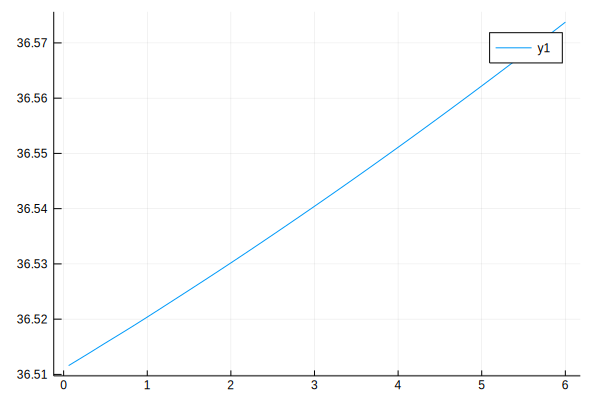

In [29]:
plot(t, nV)

In [30]:
nV[end] - nV[1] # изменение нормы на протяжении эксперимента

0.06216504585781735

При `λ` = 0.3 схема *КН* не дает решения. Далее отрабатывает неявная схема.

In [19]:
@time U, x, t, nV = schredinger(λ = 0.4, δ = 0., M = 20000);

dt = 0.002400480096019204dx = 0.006001200240048009
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 244.368729 seconds (4.75 G allocations: 99.127 GiB, 10.88% gc time)


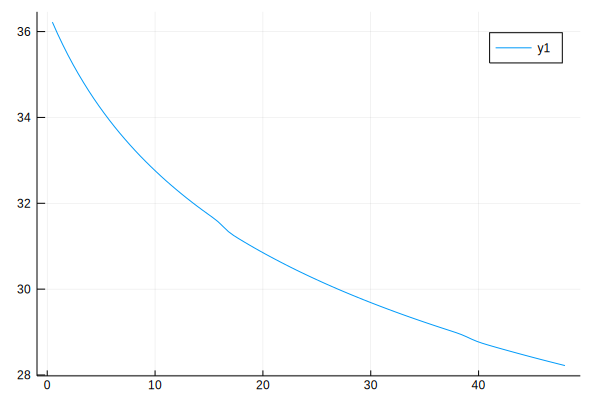

In [20]:
plot(t, nV)

In [22]:
nV[end] - nV[1] 

-8.001247630994214

Хотя неявная схема и имеет гарантированную сходимость, норма сохраняется плохо. Вычисления становятся более требовательны к параметру `M`

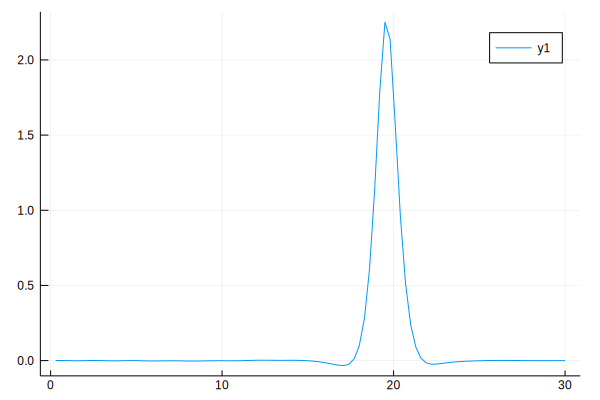

In [23]:
u = real.(U[:,20])
plot(x, u)

In [24]:
Us = real.(U);

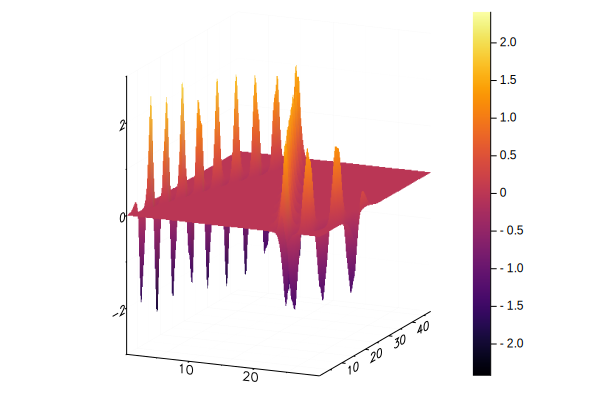

In [25]:
surface(x,t,Us)

In [17]:
cd("C:\\Users\\User\\Downloads\\Jupiter Sandbox\\MGA\\plots\\")

In [26]:
# сохраняем все графики на диск
for k = 1:length(t)
    u = real.(U[:,k])
    plot(x, u, legend = false);
    yaxis!( (-3, 3), -3:0.5:3 )
    savefig("fig$k.png")
end

![animation](anim.gif)

## Имплементация на FORTRAN

```fortran
program schredinger
    
	real(8),parameter:: pi = 3.1415926536, L = 30.0
	integer(4),parameter:: N = 5000
    integer(4),parameter:: M = 20000
    integer(4),parameter:: cutn = 100, cutm = 200
    complex(8),parameter:: II = (0.0, 1.0)
	integer(4):: i, k, count, count1, number, number1
	real(8):: nu, AA, BB, C1, C2, x0, lambda, dx, dt, time, coord, delta 
    complex(8):: a, b, c, d
	complex(8):: v(1:N), xi(1:N), eta(1:N), U(1:N/cutn,1:M/cutm)
    real(8):: normv(1:M), timegrid(1:M/cutm), coordgrid(1:N/cutn)
    character(4) num
	
    count=50
    number=0
    
    nu = 1.0
    AA=2.0
    BB=1.0
    C1=0.0
    C2=0.0
    x0=3.0
	
    lambda = 0.1                    !задание параметра Куранта
    dx = L/(N-1)
    dt = lambda*dx
    delta = 0.5
    
    write(*,*) "dt = ", dt, "dx = ", dx
    
    do i=1,N                          !печальные данные
	v(i) = AA*sqrt(2.0/nu)*exp(II*(BB*((i-1)*dx-x0)+C1))/cosh(AA*((i-1)*dx-x0)+C2)
    enddo
	
    time = 0.
    coord = 0.
    
    do i=1,N  
        if ( mod(i, cutn) .eq. 0 ) then
            coordgrid(i/cutn) = coord
        endif
        coord = coord + dx
    enddo
		
    do k = 1,M
        
        normv(k)=0.0
        do i=1,N                       
            normv(k) = normv(k) + abs(v(i))*abs(v(i))
        enddo
        normv(k)=sqrt( normv(k) )

        call progonka()
        
        v(1)=0.0   !граничное условие на левой границе     
        v(N)=0.0   !граничное условие на правой границе 

        if ( mod(k, cutm) .eq. 0 ) then
            do i=1,N  
                if ( mod(i, cutn) .eq. 0 ) then
                    U(i/cutn,k/cutm) = v(i)
                endif
            enddo
            write(*,*) k/cutm, normv(k)
            timegrid(k/cutm) = time
        endif
        time=time+dt
    enddo

    open(6, file = 'normngrids.txt')

    write(6,*)M/cutm
    write(6,*)N/cutn
    
    do i=1,M/cutm
        write(6,*) timegrid(i)
    enddo
    
    do i=1,N/cutn
        write(6,*) coordgrid(i)
    enddo
    
    do k=1,M
        if (mod(k,cutm).eq.0) then
            write(6,*) normv(k)
        endif
    enddo
    !!!!!!!!!!!!!!!!!!!!!!!!!!!!
    Open(8,file='results.txt')! 

    do i=1,M/cutm
        write(8,*) real( U(:,i) )
    enddo
    !!!!!!!!!!!!!!!!!!!!!!!!!!!!
    close(6) 
    !close(7)
    close(8)
    
    contains
        subroutine progonka()
            b = 2.0-II*dx/lambda-(1-delta)*dx*dx*nu*abs(v(2))*abs(v(2))
            d = II*v(2)*dx/lambda-delta*dx*dx*nu*abs(v(2))*abs(v(2))*v(2)
            xi(3) = 1.0/b
            eta(3) = -d/b

            do i=3,N-2
                b = 2.0-II*dx/lambda-(1-delta)*dx*dx*nu*abs(v(i))*abs(v(i))
                d = II*v(i)*dx/lambda-delta*dx*dx*nu*abs(v(i))*abs(v(i))*v(i)
                xi(i+1) = 1/(b-xi(i))
                eta(i+1) = (eta(i)-d)/(b-xi(i))
            enddo

            b = 2.0-II*dx/lambda-(1-delta)*dx*dx*nu*abs(v(N-1))*abs(v(N-1))
            d = II*v(N-1)*dx/lambda-delta*dx*dx*nu*abs(v(N-1))*abs(v(N-1))*v(N-1)
            eta(N) = (eta(N-1)-d)/(b-xi(N-1))
            v(N-1) = eta(N)

            do i=2,N-2
                v(N-i) = xi(N-i+1)*v(N-i+1)+eta(N-i+1)
            enddo
            
        end subroutine progonka

end program
```